# Load libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
from scipy.stats import wilcoxon
from matplotlib.ticker import MaxNLocator
import numpy as np

from sklearn.decomposition import PCA
from scipy.ndimage.filters import gaussian_filter
import csv

/var/folders/jn/x2x9w_8n77b_g5cnyyfbzc9w0000gp/T/ipykernel_9500/1516573476.py:9: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter


# Define Color maps

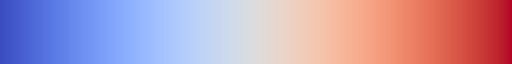

In [2]:
scw = []

with open('../../data/processed_data/common/smooth-cool-warm-table-float-1024.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for i, rows in enumerate(reader):
        if i > 0:
            r = [float(i) for i in rows]
            scw.append(tuple(r[1:]))
            scw.append(r[0])
            
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = list(seq) + [(None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return colors.LinearSegmentedColormap('CustomMap', cdict)

c = colors.ColorConverter().to_rgb
rvb = make_colormap(scw)
rvb

# Color palette

In [3]:
blue = [0.229999504, 0.298998934, 0.754000139]
red = [0.706000136, 0.015991824, 0.150000072]
purple = [0.4588, 0.4392, 0.7020]
mint = [0.1059, 0.6196, 0.4667]

In [4]:
edf3eh = np.load('../../data/processed_data/extended_data_figure_3/panels_e-h.npz')
session_neurons=edf3eh['session_neurons']
r2_findr_priors_l1=edf3eh['r2_findr_priors_l1']
pc_explained_l1=edf3eh['pc_explained_l1']
r2_findr_priors_l2=edf3eh['r2_findr_priors_l2']
pc_explained_l2=edf3eh['pc_explained_l2']
r2_findr_priors_l3=edf3eh['r2_findr_priors_l3']
pc_explained_l3=edf3eh['pc_explained_l3']
r2_findr_priors_l4=edf3eh['r2_findr_priors_l4']
pc_explained_l4=edf3eh['pc_explained_l4']
r2_findr_priors_pc_l3=edf3eh['r2_findr_priors_pc_l3']
r2_findr_priors_pc_l4=edf3eh['r2_findr_priors_pc_l4']

# Extended Data Figure 3g

In [5]:
pvalues_l12 = []
for session_id in range(27):
    res = wilcoxon(
        r2_findr_priors_l2[session_neurons[0,session_id]:session_neurons[1,session_id]] - \
        r2_findr_priors_l1[session_neurons[0,session_id]:session_neurons[1,session_id]]
    )
    pvalues_l12.append(res.pvalue)
pvalues_l12 = np.array(pvalues_l12)

pvalues_l23 = []
for session_id in range(27):
    res = wilcoxon(
        r2_findr_priors_l3[session_neurons[0,session_id]:session_neurons[1,session_id]] - \
        r2_findr_priors_l2[session_neurons[0,session_id]:session_neurons[1,session_id]]
    )
    pvalues_l23.append(res.pvalue)
pvalues_l23 = np.array(pvalues_l23)

pvalues_l34 = []
for session_id in range(27):
    res = wilcoxon(
        r2_findr_priors_l4[session_neurons[0,session_id]:session_neurons[1,session_id]] - \
        r2_findr_priors_l3[session_neurons[0,session_id]:session_neurons[1,session_id]]
    )
    pvalues_l34.append(res.pvalue)
pvalues_l34 = np.array(pvalues_l34)

l1_medians = []
l2_medians = []
l3_medians = []
l4_medians = []
for session_id in range(27):
    l4_medians.append(np.median(r2_findr_priors_l4[session_neurons[0,session_id]:session_neurons[1,session_id]]))
    l3_medians.append(np.median(r2_findr_priors_l3[session_neurons[0,session_id]:session_neurons[1,session_id]]))
    l2_medians.append(np.median(r2_findr_priors_l2[session_neurons[0,session_id]:session_neurons[1,session_id]]))
    l1_medians.append(np.median(r2_findr_priors_l1[session_neurons[0,session_id]:session_neurons[1,session_id]]))

l1_medians = np.array(l1_medians)
l2_medians = np.array(l2_medians)
l3_medians = np.array(l3_medians)
l4_medians = np.array(l4_medians)

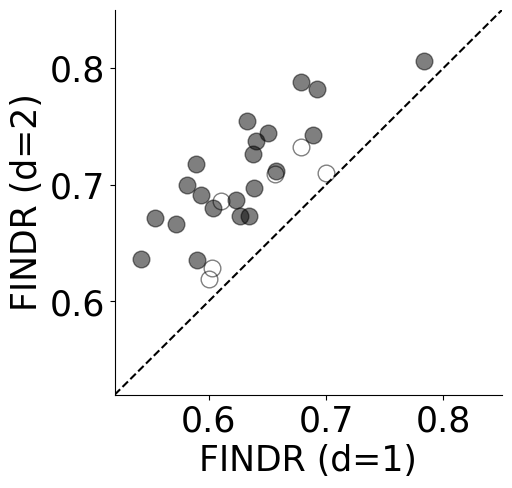

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(
    l1_medians[pvalues_l12 < 0.001], l2_medians[pvalues_l12 < 0.001], 
    'o', 
    color='black', 
    markersize=12, 
    alpha=0.5
)
ax.plot(
    l1_medians[pvalues_l12 >= 0.001], l2_medians[pvalues_l12 >= 0.001], 
    'o', 
    color='black', 
    mfc='none', 
    markersize=12, 
    alpha=0.5
)
ax.plot(
    [0.50, 0.85],
    [0.50, 0.85],
    '--',
    color='black'
)

ax.set_xlabel("FINDR (d=1)", fontsize=25)
ax.set_ylabel("FINDR (d=2)", fontsize=25)
ax.set_xticks([0.6, 0.7, 0.8])
ax.set_yticks([0.6, 0.7, 0.8])
ax.set_xlim([0.52, 0.85])
ax.set_ylim([0.52, 0.85])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=25)

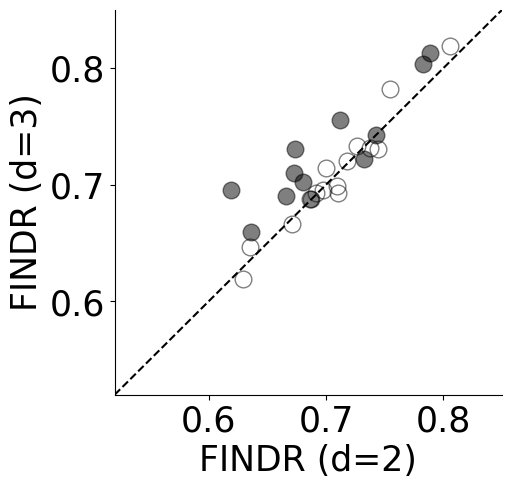

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(
    l2_medians[pvalues_l23 < 0.001], l3_medians[pvalues_l23 < 0.001], 
    'o', 
    color='black', 
    markersize=12, 
    alpha=0.5
)
ax.plot(
    l2_medians[pvalues_l23 >= 0.001], l3_medians[pvalues_l23 >= 0.001], 
    'o', 
    color='black', 
    mfc='none', 
    markersize=12, 
    alpha=0.5
)
ax.plot(
    [0.50, 0.85],
    [0.50, 0.85],
    '--',
    color='black'
)

ax.set_xlabel("FINDR (d=2)", fontsize=25)
ax.set_ylabel("FINDR (d=3)", fontsize=25)
ax.set_xticks([0.6, 0.7, 0.8])
ax.set_yticks([0.6, 0.7, 0.8])
ax.set_xlim([0.52, 0.85])
ax.set_ylim([0.52, 0.85])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=25)

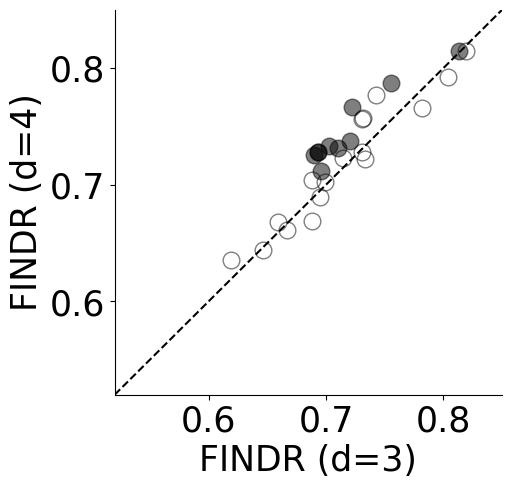

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(
    l3_medians[pvalues_l34 < 0.001], l4_medians[pvalues_l34 < 0.001], 
    'o', 
    color='black', 
    markersize=12, 
    alpha=0.5
)
ax.plot(
    l3_medians[pvalues_l34 >= 0.001], l4_medians[pvalues_l34 >= 0.001], 
    'o', 
    color='black', 
    mfc='none', 
    markersize=12, 
    alpha=0.5
)
ax.plot(
    [0.50, 0.85],
    [0.50, 0.85],
    '--',
    color='black'
)

ax.set_xlabel("FINDR (d=3)", fontsize=25)
ax.set_ylabel("FINDR (d=4)", fontsize=25)
ax.set_xticks([0.6, 0.7, 0.8])
ax.set_yticks([0.6, 0.7, 0.8])
ax.set_xlim([0.52, 0.85])
ax.set_ylim([0.52, 0.85])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=25)

# Extended Data Figure 3f

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/var/folders/jn/x2x9w_8n77b_g5cnyyfbzc9w0000gp/T/ipykernel_9500/3719164578.py:14: SyntaxWarning: invalid escape sequence '\D'
  ax.set_xlabel("Evidence-sign conditioned PSTH $\Delta R^2$ \n FINDR (d=2) − FINDR (d=1)", fontsize=20)


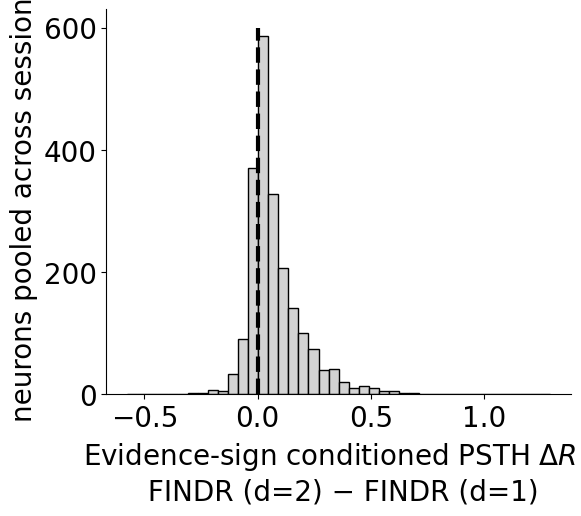

In [9]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(6, 5))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.hist(
    r2_findr_priors_l2 - r2_findr_priors_l1, 
    bins=int(np.sqrt(len(r2_findr_priors_l2)))-3, 
    color='lightgray', 
    edgecolor='black'
)

ax.vlines(x=0, ymin=0, ymax=600, color='k', linestyle='--', linewidth=3)

ax.set_xlabel("Evidence-sign conditioned PSTH $\Delta R^2$ \n FINDR (d=2) − FINDR (d=1)", fontsize=20)
ax.set_ylabel("neurons pooled across sessions", fontsize=20)
ax.set_yticks([0, 200, 400, 600])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=20)

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/var/folders/jn/x2x9w_8n77b_g5cnyyfbzc9w0000gp/T/ipykernel_9500/4277392491.py:14: SyntaxWarning: invalid escape sequence '\D'
  ax.set_xlabel("Evidence-sign conditioned PSTH $\Delta R^2$ \n FINDR (d=3) − FINDR (d=2)", fontsize=20)


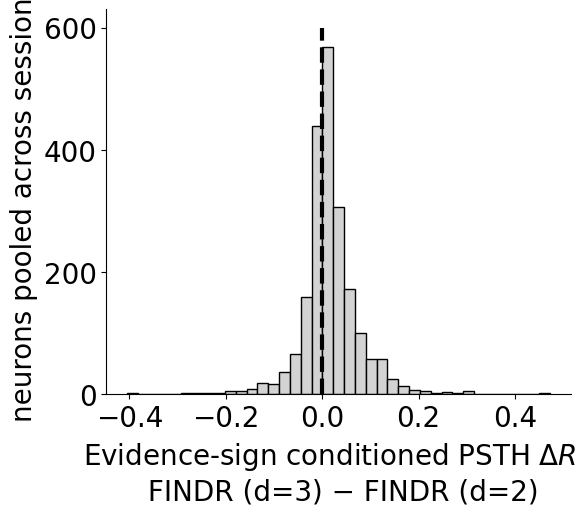

In [10]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(6, 5))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.hist(
    r2_findr_priors_l3 - r2_findr_priors_l2, 
    bins=int(np.sqrt(len(r2_findr_priors_l2)))-6, 
    color='lightgray', 
    edgecolor='black'
)

ax.vlines(x=0, ymin=0, ymax=600, color='k', linestyle='--', linewidth=3)

ax.set_xlabel("Evidence-sign conditioned PSTH $\Delta R^2$ \n FINDR (d=3) − FINDR (d=2)", fontsize=20)
ax.set_ylabel("neurons pooled across sessions", fontsize=20)
ax.set_yticks([0, 200, 400, 600])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=20)

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/var/folders/jn/x2x9w_8n77b_g5cnyyfbzc9w0000gp/T/ipykernel_9500/4242320620.py:14: SyntaxWarning: invalid escape sequence '\D'
  ax.set_xlabel("Evidence-sign conditioned PSTH $\Delta R^2$ \n FINDR (d=4) − FINDR (d=3)", fontsize=20)


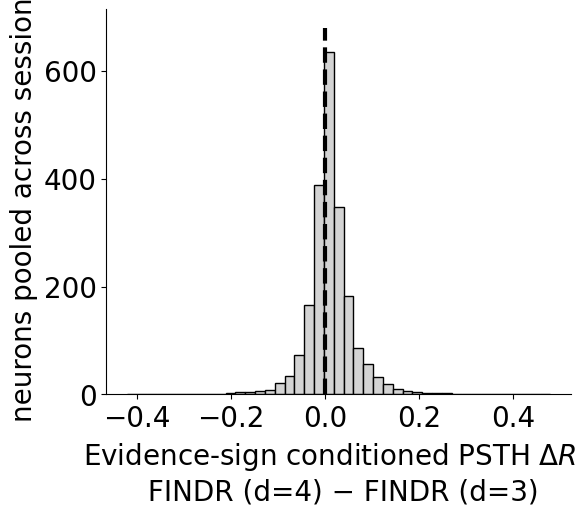

In [11]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(6, 5))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.hist(
    r2_findr_priors_l4 - r2_findr_priors_l3, 
    bins=int(np.sqrt(len(r2_findr_priors_l2)))-2, 
    color='lightgray', 
    edgecolor='black'
)

ax.vlines(x=0, ymin=0, ymax=680, color='k', linestyle='--', linewidth=3)

ax.set_xlabel("Evidence-sign conditioned PSTH $\Delta R^2$ \n FINDR (d=4) − FINDR (d=3)", fontsize=20)
ax.set_ylabel("neurons pooled across sessions", fontsize=20)
ax.set_yticks([0, 200, 400, 600])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=20)

# Extended Data Figure 3e

In [12]:
from scipy.stats import bootstrap
res0 = bootstrap((r2_findr_priors_l1,), np.median, n_resamples=1000, confidence_level=0.95)
res1 = bootstrap((r2_findr_priors_l2,), np.median, n_resamples=1000, confidence_level=0.95)
res2 = bootstrap((r2_findr_priors_l3,), np.median, n_resamples=1000, confidence_level=0.95)
res3 = bootstrap((r2_findr_priors_l4,), np.median, n_resamples=1000, confidence_level=0.95)

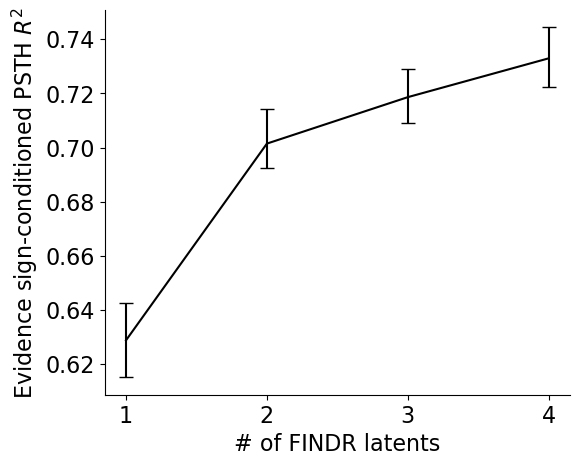

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))
x = [1, 2, 3, 4]

ybot = [
    np.median(r2_findr_priors_l1) - res0.confidence_interval.low,
    np.median(r2_findr_priors_l2) - res1.confidence_interval.low,
    np.median(r2_findr_priors_l3) - res2.confidence_interval.low,
    np.median(r2_findr_priors_l4) - res3.confidence_interval.low
]
ytop = [
    res0.confidence_interval.high - np.median(r2_findr_priors_l1),
    res1.confidence_interval.high - np.median(r2_findr_priors_l2),
    res2.confidence_interval.high - np.median(r2_findr_priors_l3),
    res3.confidence_interval.high - np.median(r2_findr_priors_l4)
]
ax.errorbar(
    x, 
    [
        np.median(r2_findr_priors_l1),
        np.median(r2_findr_priors_l2),
        np.median(r2_findr_priors_l3),
        np.median(r2_findr_priors_l4)
    ], yerr=(ybot, ytop), fmt='-', markersize=10, capsize=5, color='black')

ax.set_xticks([1, 2, 3, 4])
ax.set_xlabel("# of FINDR latents", fontsize=16)
ax.set_ylabel("Evidence sign-conditioned PSTH $R^2$", fontsize=16)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16)

# Extended Data Figure 3h

In [14]:
pc_explained_l4_cs = np.cumsum(pc_explained_l4, axis=1)
res0 = bootstrap((pc_explained_l4_cs[:,0],), np.median, n_resamples=1000, confidence_level=0.95)
res1 = bootstrap((pc_explained_l4_cs[:,1],), np.median, n_resamples=1000, confidence_level=0.95)
res2 = bootstrap((pc_explained_l4_cs[:,2],), np.median, n_resamples=1000, confidence_level=0.95)
res3 = bootstrap((pc_explained_l4_cs[:,3],), np.median, n_resamples=1000, confidence_level=0.95)

/opt/miniconda3/envs/ml-env/lib/python3.12/site-packages/scipy/stats/_resampling.py:147: RuntimeWarning: invalid value encountered in scalar divide
  a_hat = 1/6 * sum(nums) / sum(dens)**(3/2)
/opt/miniconda3/envs/ml-env/lib/python3.12/site-packages/scipy/_lib/_util.py:440: DegenerateDataWarning: The BCa confidence interval cannot be calculated. This problem is known to occur when the distribution is degenerate or the statistic is np.min.
  return fun(*args, **kwargs)


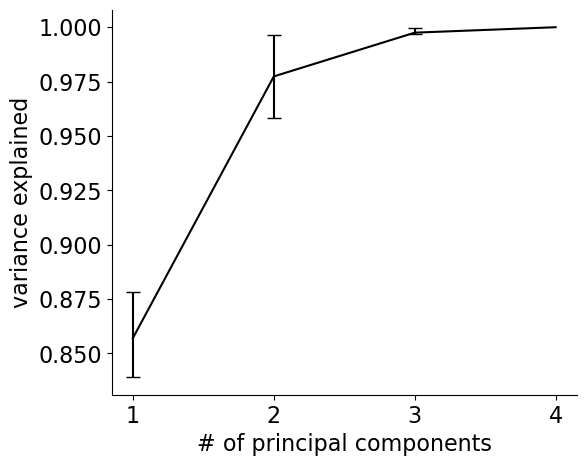

In [15]:
fig, ax = plt.subplots(figsize=(6, 5))
x = [1, 2, 3, 4]
ybot = [
    np.median(pc_explained_l4_cs[:,0]) - res0.confidence_interval.low,
    np.median(pc_explained_l4_cs[:,1]) - res1.confidence_interval.low,
    np.median(pc_explained_l4_cs[:,2]) - res2.confidence_interval.low,
    np.median(pc_explained_l4_cs[:,3]) - res3.confidence_interval.low
]
ytop = [
    res0.confidence_interval.high - np.median(pc_explained_l4_cs[:,0]),
    res1.confidence_interval.high - np.median(pc_explained_l4_cs[:,1]),
    res2.confidence_interval.high - np.median(pc_explained_l4_cs[:,2]),
    res3.confidence_interval.high - np.median(pc_explained_l4_cs[:,3])
]
ax.errorbar(
    x, 
    [
        np.median(pc_explained_l4_cs[:,0]),
        np.median(pc_explained_l4_cs[:,1]),
        np.median(pc_explained_l4_cs[:,2]),
        np.median(pc_explained_l4_cs[:,3])
    ], yerr=(ybot, ytop), fmt='-', markersize=10, capsize=5, color='black')

ax.set_xticks([1, 2, 3, 4])
ax.set_xlabel("# of principal components", fontsize=16)
ax.set_ylabel("variance explained", fontsize=16)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16)

In [16]:
pc_explained_l3_cs = np.cumsum(pc_explained_l3, axis=1)
res0 = bootstrap((pc_explained_l3_cs[:,0],), np.median, n_resamples=1000, confidence_level=0.95)
res1 = bootstrap((pc_explained_l3_cs[:,1],), np.median, n_resamples=1000, confidence_level=0.95)
res2 = bootstrap((pc_explained_l3_cs[:,2],), np.median, n_resamples=1000, confidence_level=0.95)

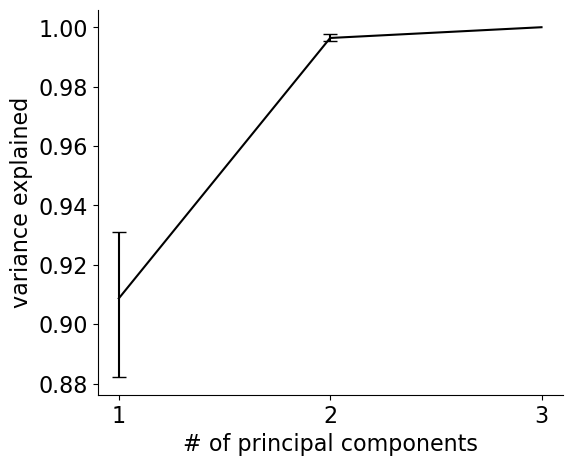

In [17]:
fig, ax = plt.subplots(figsize=(6, 5))
x = [1, 2, 3]
ybot = [
    np.median(pc_explained_l3_cs[:,0]) - res0.confidence_interval.low,
    np.median(pc_explained_l3_cs[:,1]) - res1.confidence_interval.low,
    np.median(pc_explained_l3_cs[:,2]) - res2.confidence_interval.low
]
ytop = [
    res0.confidence_interval.high - np.median(pc_explained_l3_cs[:,0]),
    res1.confidence_interval.high - np.median(pc_explained_l3_cs[:,1]),
    res2.confidence_interval.high - np.median(pc_explained_l3_cs[:,2])
]
ax.errorbar(
    x, 
    [
        np.median(pc_explained_l3_cs[:,0]),
        np.median(pc_explained_l3_cs[:,1]),
        np.median(pc_explained_l3_cs[:,2])
    ], yerr=(ybot, ytop), fmt='-', markersize=10, capsize=5, color='black')

ax.set_xticks([1, 2, 3])
ax.set_xlabel("# of principal components", fontsize=16)
ax.set_ylabel("variance explained", fontsize=16)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16)

In [18]:
pc_explained_l2_cs = np.cumsum(pc_explained_l2, axis=1)
res0 = bootstrap((pc_explained_l2_cs[:,0],), np.median, n_resamples=1000, confidence_level=0.95)
res1 = bootstrap((pc_explained_l2_cs[:,1],), np.median, n_resamples=1000, confidence_level=0.95)

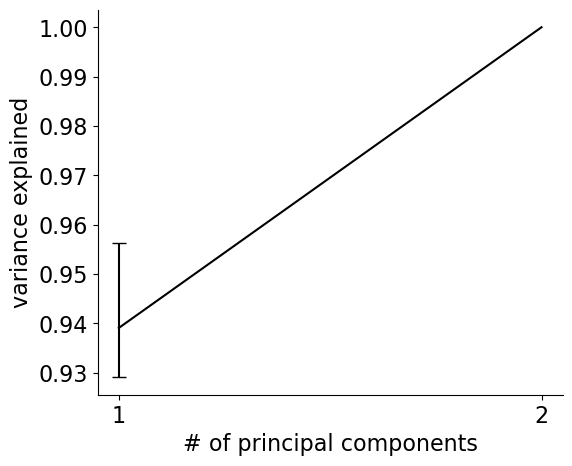

In [19]:
fig, ax = plt.subplots(figsize=(6, 5))
x = [1, 2]
ybot = [
    np.median(pc_explained_l2_cs[:,0]) - res0.confidence_interval.low,
    np.median(pc_explained_l2_cs[:,1]) - res1.confidence_interval.low
]
ytop = [
    res0.confidence_interval.high - np.median(pc_explained_l2_cs[:,0]),
    res1.confidence_interval.high - np.median(pc_explained_l2_cs[:,1])
]
ax.errorbar(
    x, 
    [
        np.median(pc_explained_l2_cs[:,0]),
        np.median(pc_explained_l2_cs[:,1])
    ], yerr=(ybot, ytop), fmt='-', markersize=10, capsize=5, color='black')

ax.set_xticks([1, 2])
ax.set_xlabel("# of principal components", fontsize=16)
ax.set_ylabel("variance explained", fontsize=16)
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=16)